In [12]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud 
from wordcloud import STOPWORDS 
import nltk 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns 
import scikitplot as skplt 
from sklearn.model_selection import train_test_split 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #класс оценок

#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [13]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import os
#print(os.listdir("../input"))

<h2>Read Data

In [15]:
df = pd.read_csv("C:/Users/User/Downloads/Twitter_Data.csv", encoding = 'latin-1', nrows=14000)

<h2>Show Data

In [16]:
df.head(11)

,clean_text,category
0,when modi promised âminimum government maxim...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
5,kiya tho refresh maarkefir comment karo,0
6,surat women perform yagna seeks divine grace f...,0
7,this comes from cabinet which has scholars lik...,0
8,with upcoming election india saga going import...,1
9,gandhi was gay does modi,1


<h2>Splitting the labels and the data separately

In [17]:
df.columns = ['Message', 'Label']
df.dropna(subset=['Message'], inplace=True)
df.head()

,Message,Label
0,when modi promised âminimum government maxim...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [18]:
df_labels = df['Label']
df_labels.head(11)

0    -1
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     1
9     1
10    1
Name: Label, dtype: int64

<h2>Splitting the Test and Train Data

In [19]:
train_set, test_set, train_label, test_label = train_test_split(df, df_labels, test_size = 0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(9379, 2)
(4620, 2)

The Trainset consists of 9379 records and 2 features

The Testset consists of 4620 records and 2 features


<h2>Extracting TD-IDF from the Text Data

In [20]:
import warnings
warnings.filterwarnings("ignore", category=Warning)
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess the text data
def preprocess_text(text):
    # Remove unwanted characters and symbols
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Apply lemmatization and remove stop words
    clean_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    # Rejoin the tokens into a clean text string
    clean_text = ' '.join(clean_tokens)
    return clean_text

# Apply the preprocessing function to the text data
train_set['Clean_Message'] = train_set.Message.apply(preprocess_text)
test_set['Clean_Message'] = test_set.Message.apply(preprocess_text)

# Transform the clean text using CountVectorizer
count_vect = CountVectorizer(ngram_range=(2, 2))
x_train_counts = count_vect.fit_transform(train_set.Clean_Message)
x_test_counts = count_vect.transform(test_set.Clean_Message)

# Transform the count vectorized data using TfidfTransformer
tfidf_transformer = TfidfTransformer()
x_train_df = tfidf_transformer.fit_transform(x_train_counts)
x_test_df = tfidf_transformer.transform(x_test_counts)


<h2>Data Model
The Algorithms
<h6>
<p>Naive Bayes
<p>K-Nearest
<p>Decision Tree
<p>Support Vector Machine
<p>Random Forest


<h3>Naive Bayes Classifier

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

The accuracy of Naive Bayes clasifier is 51.55844155844156%

 [[ 117  262  716]
 [  10  732  829]
 [  14  407 1533]]


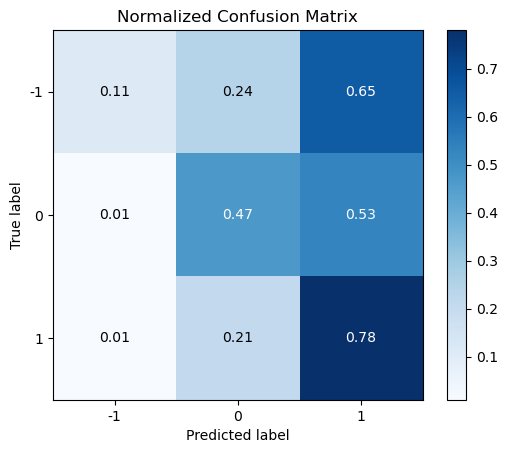

In [22]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.Label)
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set.Label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.Label, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize = True)
plt.show()

The accuracy of Naive Bayes classifier is 51.55844155844156%
Precision: 0.58
Recall: 0.52
F1 Score: 0.47

Confusion Matrix:
 [[ 117  262  716]
 [  10  732  829]
 [  14  407 1533]]


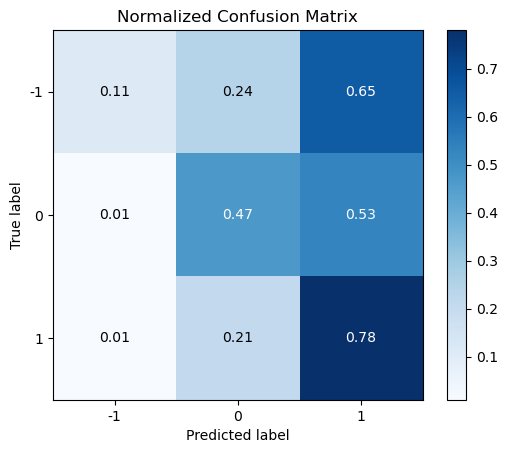

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import scikitplot as skplt

clf = MultinomialNB()
clf.fit(x_train_df, train_set.Label)
predicted_values_NB = clf.predict(x_test_df)

# Accuracy
accuracy_NB = accuracy_score(test_set.Label, predicted_values_NB)
print("The accuracy of Naive Bayes classifier is {}%".format(accuracy_NB * 100))

# Precision
precision_NB = precision_score(test_set.Label, predicted_values_NB, average='weighted')
print("Precision: {:.2f}".format(precision_NB))

# Recall
recall_NB = recall_score(test_set.Label, predicted_values_NB, average='weighted')
print("Recall: {:.2f}".format(recall_NB))

# F1 score
f1_NB = f1_score(test_set.Label, predicted_values_NB, average='weighted')
print("F1 Score: {:.2f}".format(f1_NB))

# Confusion matrix
confusion_matrix_NB = confusion_matrix(test_set.Label, predicted_values_NB)
print("\nConfusion Matrix:\n", confusion_matrix_NB)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize=True)
plt.show()




<h3>K-Nearest Neighbors algorithm

[0 0 0 ... 0 0 0]

The accuracy of K-Nearest Neighbors algorithm is 35.67099567099567%

 [[  20 1065   10]
 [   1 1553   17]
 [   2 1877   75]]


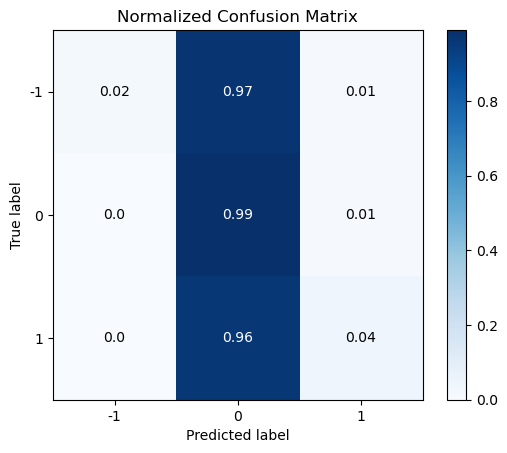

In [24]:
#KNN = KNeighborsClassifier(metric = 'euclidean')
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_KNN, normalize = True)
plt.show()

The accuracy of K-Nearest Neighbors algorithm is 35.67099567099567%
Precision: 0.63
Recall: 0.36
F1 Score: 0.21

Confusion Matrix:
 [[  20 1065   10]
 [   1 1553   17]
 [   2 1877   75]]


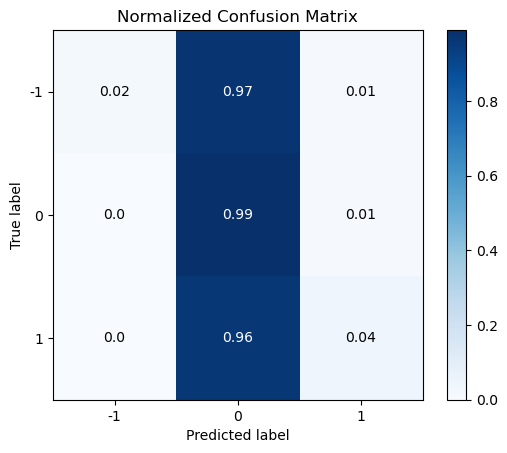

In [25]:


KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predicted_values_KNN = KNN.predict(x_test_df)

# Accuracy
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
print("The accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))

# Precision
precision_KNN = precision_score(test_set.Label, predicted_values_KNN, average='weighted')
print("Precision: {:.2f}".format(precision_KNN))

# Recall
recall_KNN = recall_score(test_set.Label, predicted_values_KNN, average='weighted')
print("Recall: {:.2f}".format(recall_KNN))

# F1 score
f1_KNN = f1_score(test_set.Label, predicted_values_KNN, average='weighted')
print("F1 Score: {:.2f}".format(f1_KNN))

# Confusion matrix
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\nConfusion Matrix:\n", confusion_matrix_KNN)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_KNN, normalize=True)
plt.show()


<h2>Decision Tree learning

[1 0 0 ... 0 0 1]

The accuracy of Decision Tree learning is 48.2034632034632%

 [[ 304  613  178]
 [ 101 1278  192]
 [ 157 1152  645]]


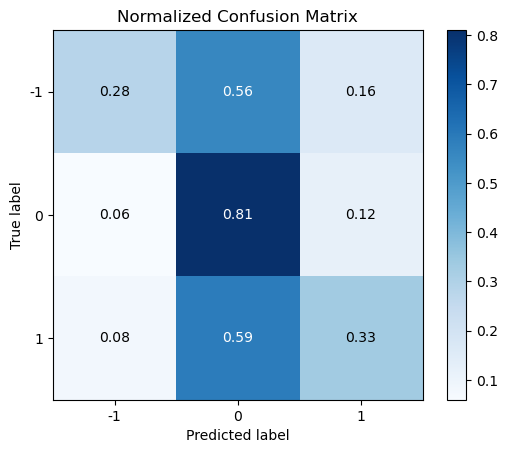

In [26]:
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.Label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
accuracy_DT = accuracy_score(test_set.Label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.Label, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_DT, normalize = True)
plt.show()


The accuracy of Decision Tree learning is 47.61904761904761%
Precision: 0.53
Recall: 0.48
F1 Score: 0.45

Confusion Matrix:
 [[ 297  622  176]
 [ 108 1286  177]
 [ 165 1172  617]]


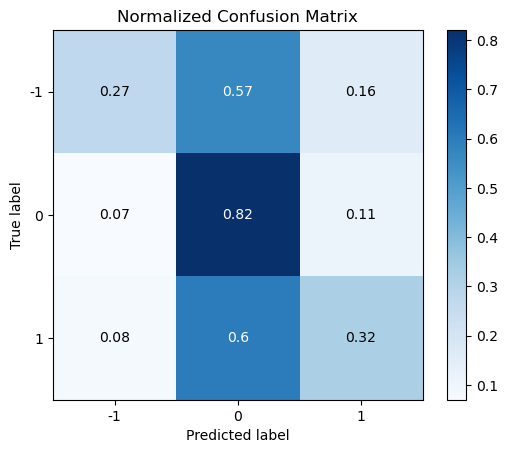

In [27]:


DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.Label)
predicted_values_DT = DT.predict(x_test_df)

# Accuracy
accuracy_DT = accuracy_score(test_set.Label, predicted_values_DT)
print("The accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))

# Precision
precision_DT = precision_score(test_set.Label, predicted_values_DT, average='weighted')
print("Precision: {:.2f}".format(precision_DT))

# Recall
recall_DT = recall_score(test_set.Label, predicted_values_DT, average='weighted')
print("Recall: {:.2f}".format(recall_DT))

# F1 score
f1_DT = f1_score(test_set.Label, predicted_values_DT, average='weighted')
print("F1 Score: {:.2f}".format(f1_DT))

# Confusion matrix
confusion_matrix_DT = confusion_matrix(test_set.Label, predicted_values_DT)
print("\nConfusion Matrix:\n", confusion_matrix_DT)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_DT, normalize=True)
plt.show()


<h2>Support Vector Machine (SVM)

[1 1 1 ... 1 1 1]

The accuracy of Support Vector Machine (SVM) is 52.74891774891775%

 [[ 147  183  765]
 [   5  702  864]
 [  21  345 1588]]


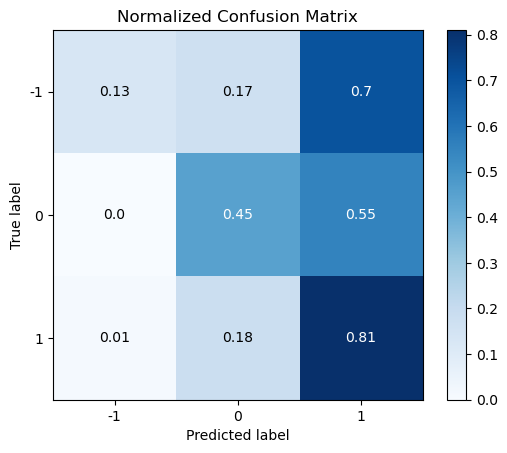

In [28]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.Label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
accuracy_SVM = accuracy_score(test_set.Label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.Label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_SVM, normalize = True)
plt.show()

The accuracy of Support Vector Machine (SVM) is 52.74891774891775%
Precision: 0.60
Recall: 0.53
F1 Score: 0.49

Confusion Matrix:
 [[ 147  183  765]
 [   5  702  864]
 [  21  345 1588]]


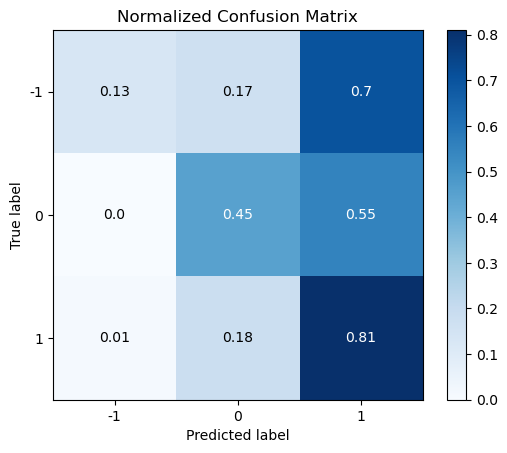

In [29]:


SVM = svm.SVC()
SVM.fit(x_train_df, train_set.Label)
predicted_values_SVM = SVM.predict(x_test_df)

# Accuracy
accuracy_SVM = accuracy_score(test_set.Label, predicted_values_SVM)
print("The accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))

# Precision
precision_SVM = precision_score(test_set.Label, predicted_values_SVM, average='weighted')
print("Precision: {:.2f}".format(precision_SVM))

# Recall
recall_SVM = recall_score(test_set.Label, predicted_values_SVM, average='weighted')
print("Recall: {:.2f}".format(recall_SVM))

# F1 score
f1_SVM = f1_score(test_set.Label, predicted_values_SVM, average='weighted')
print("F1 Score: {:.2f}".format(f1_SVM))

# Confusion matrix
confusion_matrix_SVM = confusion_matrix(test_set.Label, predicted_values_SVM)
print("\nConfusion Matrix:\n", confusion_matrix_SVM)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_SVM, normalize=True)
plt.show()


<h2>Random Forest

[1 0 1 ... 0 1 1]

The accuracy of Random Forest is 48.54978354978355%

 [[ 232  733  130]
 [  20 1427  124]
 [  62 1308  584]]


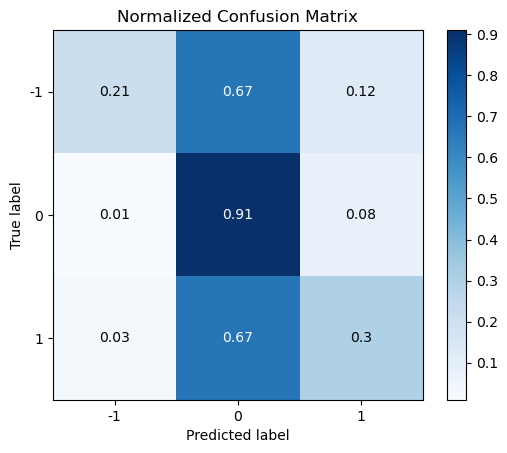

In [30]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)
# n_estimators - количество деревьев в лесе
# oob_score - использовать ли образцы вне примеров для оценки точности обобщения
RF.fit(x_train_df, train_set.Label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
accuracy_RF = accuracy_score(test_set.Label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.Label, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_RF, normalize = True)
plt.show()

The accuracy of Random Forest is 48.54978354978355%
Precision: 0.61
Recall: 0.49
F1 Score: 0.45

Confusion Matrix:
 [[ 232  733  130]
 [  20 1427  124]
 [  62 1308  584]]


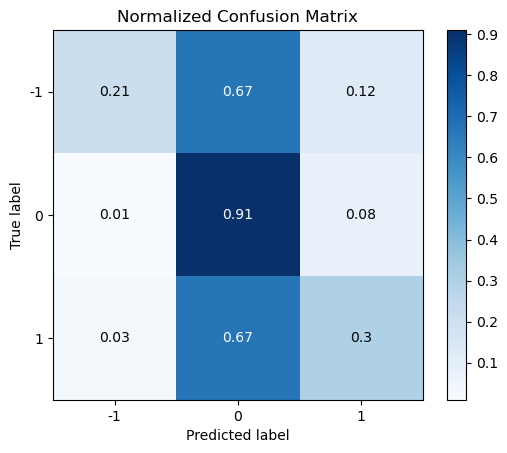

In [31]:
RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
RF.fit(x_train_df, train_set.Label)
predicted_values_RF = RF.predict(x_test_df)

# Accuracy
accuracy_RF = accuracy_score(test_set.Label, predicted_values_RF)
print("The accuracy of Random Forest is {}%".format(accuracy_RF * 100))

# Precision
precision_RF = precision_score(test_set.Label, predicted_values_RF, average='weighted')
print("Precision: {:.2f}".format(precision_RF))

# Recall
recall_RF = recall_score(test_set.Label, predicted_values_RF, average='weighted')
print("Recall: {:.2f}".format(recall_RF))

# F1 score
f1_RF = f1_score(test_set.Label, predicted_values_RF, average='weighted')
print("F1 Score: {:.2f}".format(f1_RF))

# Confusion matrix
confusion_matrix_RF = confusion_matrix(test_set.Label, predicted_values_RF)
print("\nConfusion Matrix:\n", confusion_matrix_RF)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_RF, normalize=True)
plt.show()


<h2>Method Comparison

,Algorithms,Percentage
0,Naive Bayes,51.558442
1,K-Nearest Neighbors algorithm,35.670996
2,Decision Tree learning,48.203463
3,Support Vector Machine (SVM),52.748918
4,Random Forest,48.549784


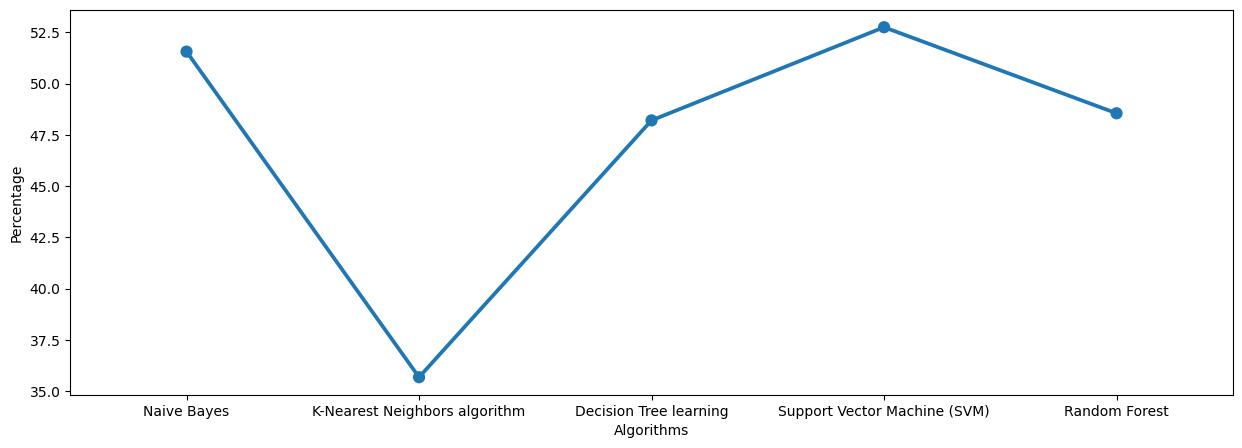

In [32]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);